In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

Welcome to JupyROOT 6.26/04


In [2]:
base_file_loc = '/home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT'
base_file_loc = '/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel'
# base_file_loc = '/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_optimized_v0_240909_roe_Dptag_CFT_nontag'

In [3]:
!ls /share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/

MC15ri_etaetapip_loose_v0_240505_etapi0const
MC15ri_etaetapip_loose_v0_240715_etapi0const
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT
MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_addcosHel
MC15ri_etaetapip_loose_v0_240910_roe_Dptag_CFT
MC15ri_etaetapip_optimized_v0_240909_roe_Dptag_CFT
MC15ri_etaetapip_optimized_v0_240909_roe_Dptag_CFT_nontag
MC15ri_etaetapip_tight_v2_240708_Kp_BCS_etapi0const
MC15ri_etaetapip_tight_v2_240730_Kp_BCS_etapi0const
MC15ri_etaetapip_tight_v2_240827_roe_Dptag
MC15ri_etaetapip_tight_v2_2_240828_roe_Dptag_CFT
MC15ri_etaetapip_tight_v4_240716_Kp_BCS_etapi0const


In [4]:
!ls /home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT

ls: '/home/belle2/jaeyoung/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT'에 접근할 수 없습니다: 그런 파일이나 디렉터리가 없습니다


In [6]:
# generic_ccbar = base_file_loc + 'ccbar/tight_v2_240827_roe_Dptag_ccbar_output_00*.root'

generic_ccbar = base_file_loc + '/*ccbar.root'

# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

generic_uubar = base_file_loc + '/*uubar.root'
generic_ddbar = base_file_loc + '/*ddbar.root'
generic_ssbar = base_file_loc + '/*ssbar.root'
generic_charged = base_file_loc + '/*charged.root'
generic_mixed = base_file_loc + '/*mixed.root'
generic_taupair = base_file_loc + '/*taupair.root'

In [7]:
base_filter='D0_M>0'
# base_filter='etaeta_gg_rank==1'


In [8]:
tree = 'etaeta_gpi_tag'
variables = ["__experiment__", "__run__", "__event__",\
             "D0_M","D0_isSignal","Dstarp_delM","Dstarp_CMS_p","Dstarp_isSignal",\
             "Dstarp_cosAngleBetweenMomentumAndVertexVector","Dstarp_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "D0_cosAngleBetweenMomentumAndVertexVector","D0_cosAngleBetweenMomentumAndVertexVectorInXYPlane",\
             "Eta_1_isSignal", "Eta_1_M","Eta_1_p","Eta_1_daughterDiffOfPhi_0_1","Eta_1_daughterAngle_0_1","Eta_1_isSignal",\
             "Eta_2_isSignal", "Eta_2_M","Eta_2_p","Eta_2_isSignal",\
             "gamma1_E","gamma1_clusterNHits","gamma1_clusterReg",\
             "gamma2_E","gamma2_clusterNHits","gamma2_clusterReg",\
             "dM_pi0","ROE_Mgg",'veto_isSignal',\
             "dM_pi0_50MeV","ROE_Mgg_50MeV",'veto_isSignal_50MeV',\
             "dM_pi0_75MeV","ROE_Mgg_75MeV",'veto_isSignal_75MeV',\
             "dM_pi0_75MeV_2","ROE_Mgg_75MeV_2",'veto_isSignal_75MeV_2',\
             "Pis_dr","Pis_dz",\
             "gpi_eta_pi0_g1_E", "gpi_eta_pi0_g1_clusterReg",\
             "gpi_eta_pi0_g2_E", "gpi_eta_pi0_g2_clusterReg",\
             "gpi_eta_Pi0_M","gpi_eta_Pi0_daughterDiffOfPhi_0_1","gpi_eta_Pi0_daughterAngle_0_1","gpi_eta_Pi0_Easym"
            ]

In [9]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [10]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [11]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

114049
158084
0.7214455605880418


In [12]:
cut = 'D0_M>0.0'
# cut += '& abs(Eta_1_daughterDiffOfPhi_0_1)<2 & Eta_1_daughterAngle_0_1<1.7'
# cut += '& dM_pi0_75MeV>0.011 & dM_pi0_75MeV_2>0.011'

# cut += ' & ((gamma1_clusterReg==1 & gamma1_E>0.05) | (gamma1_clusterReg==3 & gamma1_E>0.075) | (gamma1_clusterReg==2 & gamma1_E>0.05))'
# cut += ' & ((gamma2_clusterReg==1 & gamma2_E>0.05) | (gamma2_clusterReg==3 & gamma2_E>0.075) | (gamma2_clusterReg==2 & gamma2_E>0.05))'
# cut += ' & ((gpi_eta_pi0_g1_clusterReg==1 & gpi_eta_pi0_g1_E>0.05) | (gpi_eta_pi0_g1_clusterReg==3 & gpi_eta_pi0_g1_E>0.075) | (gpi_eta_pi0_g1_clusterReg==2 & gpi_eta_pi0_g1_E>0.05))'
# cut += ' & ((gpi_eta_pi0_g2_clusterReg==1 & gpi_eta_pi0_g2_E>0.05) | (gpi_eta_pi0_g2_clusterReg==3 & gpi_eta_pi0_g2_E>0.075) | (gpi_eta_pi0_g2_clusterReg==2 & gpi_eta_pi0_g2_E>0.05))'

# cut += ' & Eta_1_M>0.'
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [13]:
plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/D0etaeta_gg_tag"
# plot_directory = "/media/jykim/T7/saved_plots/DRAW/etaeta/MC15ri_generic/gg"
plot_directory = "/share/storage/jykim/storage_b2/storage/PLOTS/mc15ri_generic/MC15ri_etaetapip_loose_v0_240828_roe_Dptag_CFT_non_tag/cut_study"

# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [14]:
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"

xrange = (1.6,2.1)
nbins=50
xlabel = ''
img_path = ''

In [15]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path,force_range=tuple(),unit="[GeV/c^2]"):
    data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit=unit,luminosity=luminosity,force_range=force_range)
    plt.tight_layout()

    plt.savefig(img_path)

[4623. 4663. 4473. 4327. 4443. 4286. 4233. 4045. 4063. 3951. 3863. 3806.
 3591. 3651. 3451. 3474. 3489. 3258. 3301. 3272. 3201. 3178. 3273. 3416.
 4037. 5534. 6543. 4606. 3311. 2764. 2643. 2463. 2329. 2326. 2240. 2145.
 2252. 2123. 1998. 1941. 1986. 1927. 1824. 1780. 1751. 1746. 1715. 1614.
 1667. 1488.]
fitst_bin_entries=4623.0


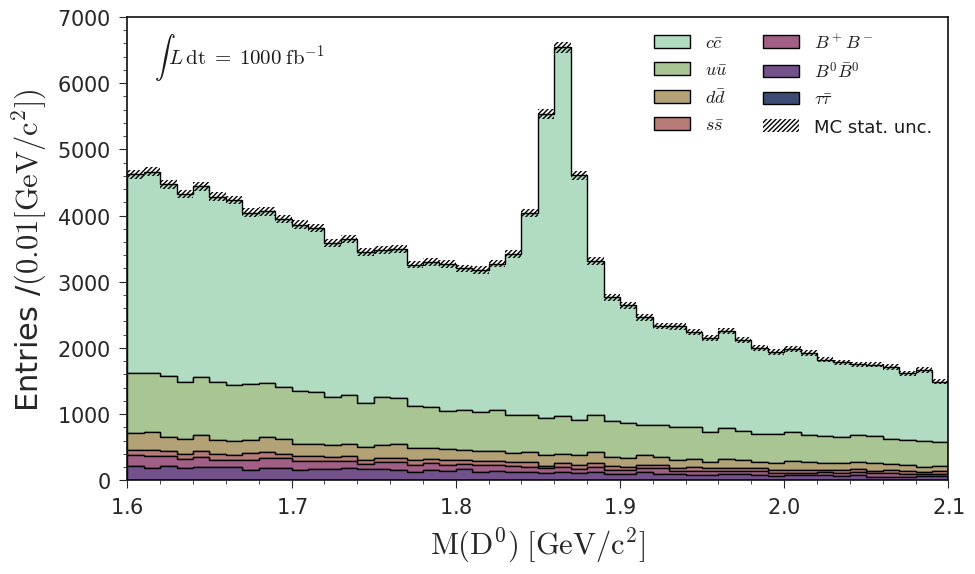

In [16]:
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

# img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_D0M_step0.png"
img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_loose_v0_D0M.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[1040. 1397. 1570. 1771. 1984. 2088. 2255. 2504. 2650. 2767. 2947. 3403.
 4720. 7582. 5486. 3870. 3413. 3328. 3255. 3376. 3184. 3337. 3185. 3163.
 3236. 3175. 3213. 3166. 3222. 3217. 3174. 3269. 3149. 3095. 3201. 3257.
 3175. 3236. 3148. 3241. 3206. 3096. 3279. 3164. 3112. 3283. 3216. 3318.
 3203. 3154.]
fitst_bin_entries=1040.0


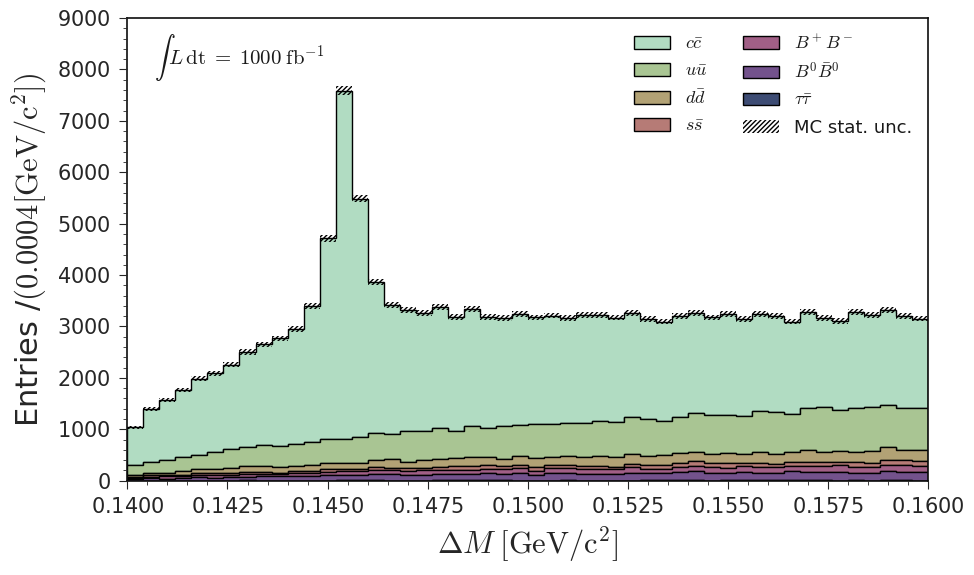

In [17]:
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0.140,0.16)
nbins = 50
xlabel = "$\Delta M$"

# img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_pre_sel_Dstarp_delM_step0.png"
# img_path = plot_directory + "/MC15ri_D0etaeta_gg_tag_tight_selv1_Dstarp_delM.png"
img_path = plot_directory + "/MC15ri_D0etaeta_gpi_tag_loose_v0_delM.png"


# img_path = plot_directory + "/test.png"
# plt.xticks(fontsize=12)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)
